# Project Name:- SMS Spam Detection

This Project is made using Crisp-DM Methodology.

### Importing all the required modules

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

## Step-1. Business Problem UnderStading

* The Business Problem is to identify Potential fraudulent messages commonly know as SMS Spam. 
* This spam messages not only irritate users but also potentialy expose them to scams, phishing attempts and malware. For business, filter the spam SMS is crucial to maintaining customers trust. 

## Step 2 & 3 :- Data Understanding and Data Preparation

In [3]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
240,ham,Tomarrow final hearing on my laptop case so i ...,NaN,NaN,NaN
48,ham,"Yeah hopefully, if tyler can't do it I could m...",NaN,NaN,NaN
83,ham,You will be in the place of that man,NaN,NaN,NaN
4504,spam,Mobile Club: Choose any of the top quality ite...,NaN,NaN,NaN
5027,ham,Go chase after her and run her over while she'...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop last three columns
df.drop (columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
df.sample(5)

,v1,v2
3193,ham,And you! Will expect you whenever you text! Ho...
581,ham,Ok anyway no need to change with what you said
3876,ham,"Sorry sir, i will call you tomorrow. senthil...."
1869,ham,Mom wants to know where you at
4884,ham,Poor girl can't go one day lmao


In [8]:
# Renaameing the columns names
df.rename (columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
3100,ham,Pathaya enketa maraikara pa'
2915,ham,What time should I tell my friend to be around?
5058,spam,Free video camera phones with Half Price line ...
5294,spam,XMAS iscoming & ur awarded either å£500 CD gif...
5420,ham,I dont know oh. Hopefully this month.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])
df.head() # ham = 0, spam = 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking the missing value
df.isnull().sum() #no missing value

target    0
text      0
dtype: int64

In [12]:
# checking for dulplicate values
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

# EDA

In [15]:
# target column value counts
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

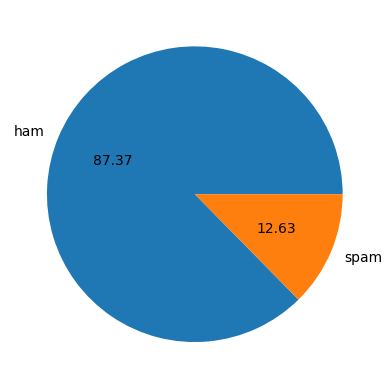

In [16]:
# visualization of target column using piechart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()
# data is imbalanced

In [ ]:
# nltk.download('punkt')

In [17]:
# Number of charaters, word and sentences in the SMS
df['text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [18]:
# 1. Numbers of characters counts
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# 2. Numbers of word counts
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# 3. NUmbers of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# For ham SMS descibe function
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# For spam SMS descibe function
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


- Here we have analyzed the ham and spam separately and found that spam messages have more charaters, word, and sentences and bigger than the ham messages on average. 
- There are also some exception to this because the ham messages have some outliers present in terms of no of charaters,word and sentences used.

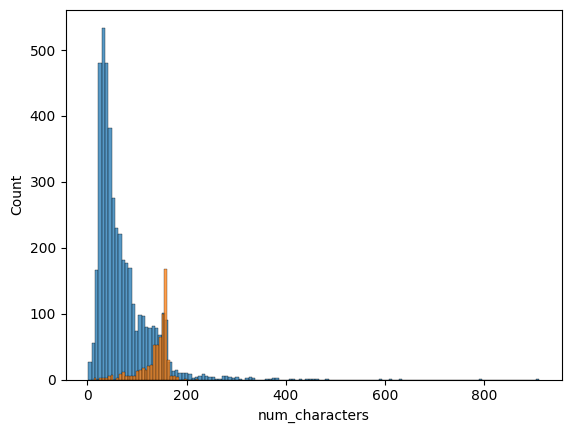

In [24]:
# Plotting Histogram for ham and spam of Numbers of charatecters
import seaborn as sns
# plt.figure(figsize = (5,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])
plt.show()

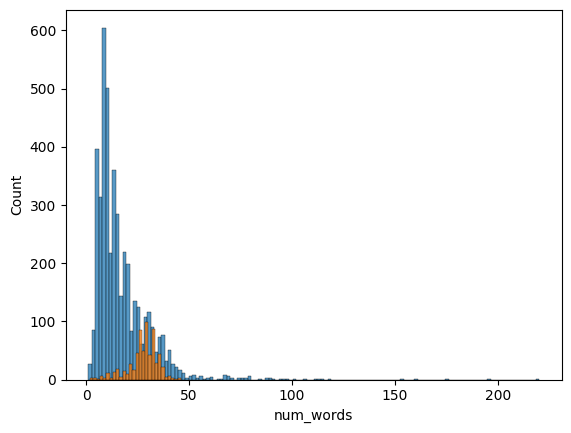

In [25]:
# Plotting Histogram for ham and spam of Numbers of words
import seaborn as sns
# plt.figure(figsize = (5,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])
plt.show()

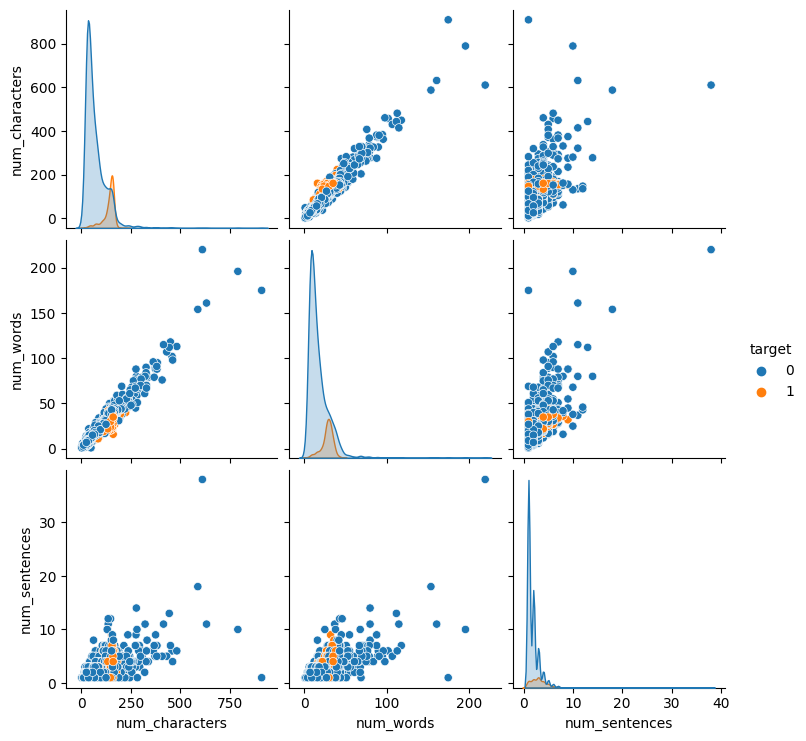

In [28]:
# Plotting Pairplot for continuous data
sns.pairplot(df,hue = 'target' )

In [29]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

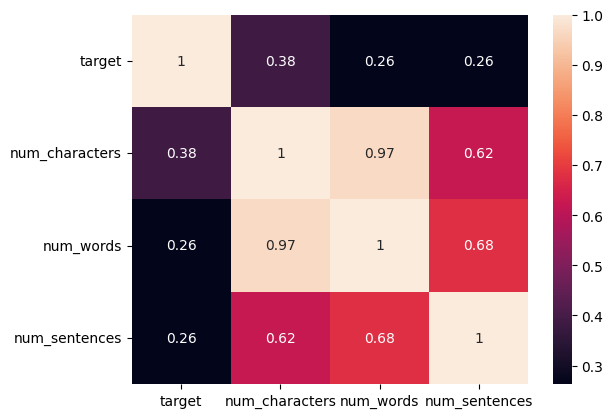

In [30]:
# plottting the heatmap for correlation between continuous values
sns.heatmap(df.corr(numeric_only=True),annot = True)

* Here we are not going to take the 3 independent continuous variable for the modelling because there are strong correlation between independent variables.  
* Only one variable that is numbers of characters columns will be considered because it has highest correlation with dependent variable among the indepedent variable that is .38.

* Or In our case, while there may be some correlation between the independent variables, the correlation between each independent variable and the dependent variable is not exceptionally high. Therefore, we may have a more manageable situation regarding multicollinearity.

### Text Preprocessing

* Lower case
* Tokenization
* Removing special charaters
* Removing stopwords and puntuation
* Stemming

In [33]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] 
    y.clear()
    
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [34]:
transform_text("Did you like my presentation on ML beautiful bird beauty?")

'like present ml beauti bird beauti'

In [35]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

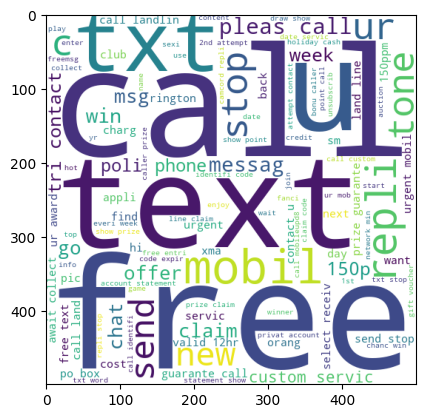

In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc)

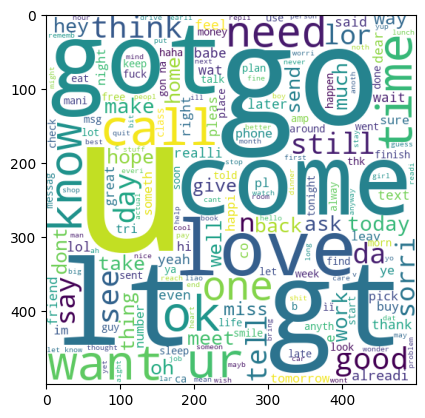

In [39]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [40]:
# Top 50 word of spam
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
print("NO of words in spam message = ",len(spam_corpus))
from collections import Counter
Counter(spam_corpus).most_common(30)

NO of words in spam message =  9939


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

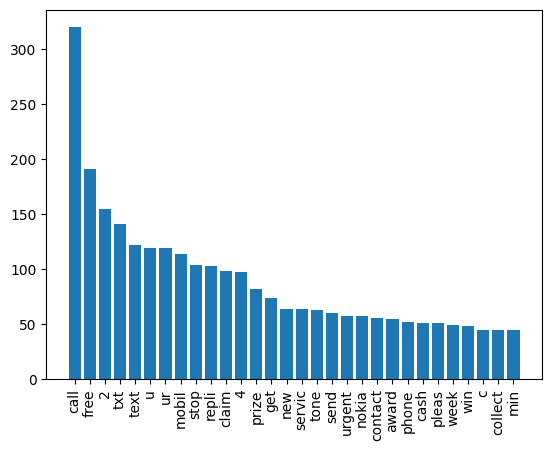

In [41]:
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
plt.bar(df_spam[0],df_spam[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [42]:
# Top 50 word of ham
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
print("NO of words in ham message = ",len(ham_corpus))
from collections import Counter
Counter(ham_corpus).most_common(30)

NO of words in ham message =  35404


[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [45]:
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
# plt.bar(df_ham[0],df_ham[1])
# plt.xticks(rotation = 'vertical')
# plt.show()

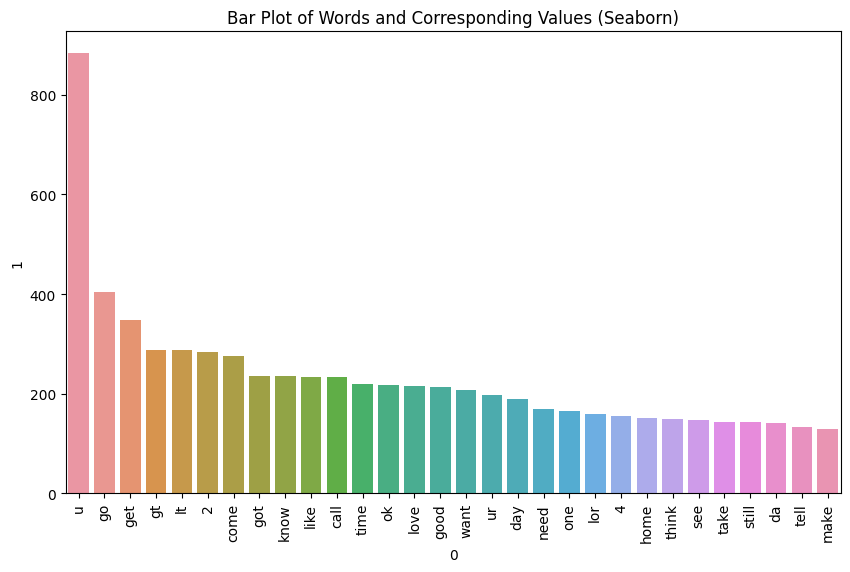

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=0, y=1, data=df_ham)
plt.xlabel(0)
plt.ylabel(1)
plt.title('Bar Plot of Words and Corresponding Values (Seaborn)')
plt.xticks(rotation = 'vertical')
plt.show()

## Vectorization

In [200]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cvr = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
# X = cvr.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [201]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# # no standard scaler because the standard scaler gives us negative values.
# # which is not accecpted by naive bayes

In [202]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [203]:
X.shape

(5169, 3001)

In [204]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [205]:
y.shape

(5169,)

### Train test split

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## Step 4 & 5 :- Model Building and Evaluation

### Naive Bayes' Algorithm

In [207]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [208]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [209]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test,y_pred1))
print("confusion matrix = ",confusion_matrix(y_test,y_pred1))
print("Precision score = ",precision_score(y_test,y_pred1))
print('recall score = ',classification_report(y_test,y_pred1,output_dict = True)['weighted avg']['recall'])

Accuracy score =  0.8878143133462283
confusion matrix =  [[790  95]
 [ 21 128]]
Precision score =  0.5739910313901345
recall score =  0.8878143133462283


In [210]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test,y_pred2))
print("confusion matrix = ",confusion_matrix(y_test,y_pred2))
print("Precision score = ",precision_score(y_test,y_pred2))
print('recall score = ',classification_report(y_test,y_pred2,output_dict = True)['weighted avg']['recall'])

Accuracy score =  0.9274661508704062
confusion matrix =  [[885   0]
 [ 75  74]]
Precision score =  1.0
recall score =  0.9274661508704062


In [211]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test,y_pred3))
print("confusion matrix = ",confusion_matrix(y_test,y_pred3))
print("Precision score = ",precision_score(y_test,y_pred3))
print('recall score = ',classification_report(y_test,y_pred3,output_dict = True)['weighted avg']['recall'])

Accuracy score =  0.9748549323017408
confusion matrix =  [[884   1]
 [ 25 124]]
Precision score =  0.992
recall score =  0.9748549323017408


1. First we try with count vectorizer and the we try with tfidf vectorizer.
2. And we got that tfidf vectorizer giving use better accuracy and precision than count vectorizer.

RESULT 
* In imbalanced data precision score is more important than accuracy score
* Here false positive should be minimum i.e. spam nahi tha but spam bola
* Here i first check with count Vectorizater where i got to know that the bernaullis Naive bayes performed the best.
* How ever when i switched to tfidf Vectorizer the precision of multinomial naive bayes touch 1. As precision is important here the best model so far is Multinomial naive bayes.

### Modelling with More Classification Algorithm

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [213]:
# after hyperparameter tuning
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [214]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [215]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [216]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8558994197292069, 0.0)

In [217]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print(f'For {name}, Accuracy = {current_accuracy} , Precision = {current_precision}')
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC, Accuracy = 0.8558994197292069 , Precision = 0.0
For KN, Accuracy = 0.9245647969052224 , Precision = 0.8034188034188035
For NB, Accuracy = 0.9274661508704062 , Precision = 1.0
For DT, Accuracy = 0.9410058027079303 , Precision = 0.8928571428571429
For LR, Accuracy = 0.9632495164410058 , Precision = 0.9743589743589743
For RF, Accuracy = 0.97678916827853 , Precision = 0.9921259842519685
For AdaBoost, Accuracy = 0.9671179883945842 , Precision = 0.9389312977099237
For BgC, Accuracy = 0.965183752417795 , Precision = 0.9185185185185185
For ETC, Accuracy = 0.9816247582205029 , Precision = 1.0
For GBDT, Accuracy = 0.9516441005802708 , Precision = 0.9380530973451328
For xgb, Accuracy = 0.971953578336557 , Precision = 0.96875


In [75]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending = False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.888781,1.000000
2,NB,0.945841,1.000000
5,RF,0.970986,1.000000
8,ETC,0.972921,0.984000
10,xgb,0.970986,0.976000
0,SVC,0.968085,0.975410
6,AdaBoost,0.967118,0.975207
9,GBDT,0.957447,0.972973
4,LR,0.956480,0.956140
7,BgC,0.963250,0.899281


In [77]:
performance_df1 = pd.melt(performance_df,id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.888781
1,NB,Accuracy,0.945841
2,RF,Accuracy,0.970986
3,ETC,Accuracy,0.972921
4,xgb,Accuracy,0.970986
5,SVC,Accuracy,0.968085
6,AdaBoost,Accuracy,0.967118
7,GBDT,Accuracy,0.957447
8,LR,Accuracy,0.956480
9,BgC,Accuracy,0.963250


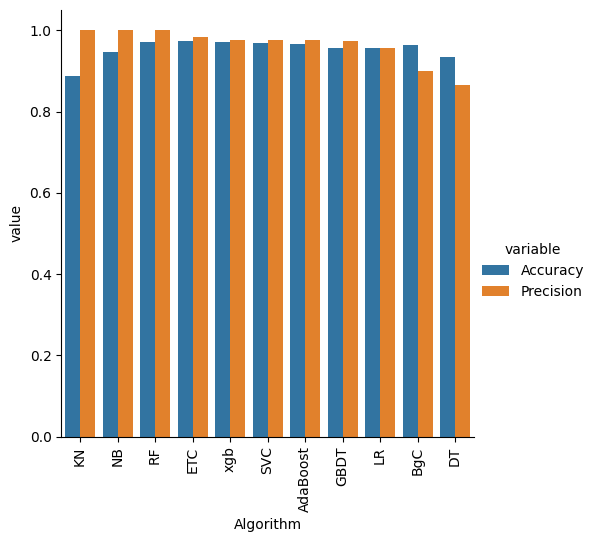

In [79]:
sns.catplot(x = 'Algorithm', y= 'value',hue = 'variable',data = performance_df1,kind = 'bar',height = 5)
plt.xticks(rotation = 'vertical')
plt.show()

Conclusion: 
* Random Forest is the best model till now with a accuracy or 0.970986 and precision score of 1.000000.

## Improvement

### 1. Changing the max_features parameter of TFIDF

* First we change the value of max_feature to 1000 then to 2000 and lastly 3000 and each time we records the performance and found out that 3000 max_feature gives us best result.

In [150]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
5,RF,0.977756,1.000000
8,ETC,0.979691,0.992308
4,LR,0.967118,0.983193
2,NB,0.977756,0.977273
10,xgb,0.971954,0.976190
6,AdaBoost,0.968085,0.967742
9,GBDT,0.955513,0.963964
0,SVC,0.965184,0.952000
7,BgC,0.959381,0.874126


In [133]:
performance_df = performance_df.merge(temp_df,on = 'Algorithm' )
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.888781,1.000000,0.907157,1.000000
1,NB,0.945841,1.000000,0.968085,1.000000
2,RF,0.970986,1.000000,0.977756,1.000000
3,ETC,0.972921,0.984000,0.979691,0.992308
4,xgb,0.970986,0.976000,0.971954,0.976190
5,SVC,0.968085,0.975410,0.974855,0.976744
6,AdaBoost,0.967118,0.975207,0.968085,0.967742
7,GBDT,0.957447,0.972973,0.955513,0.963964
8,LR,0.956480,0.956140,0.961315,0.973913
9,BgC,0.963250,0.899281,0.959381,0.874126


### 2. Applying Scaling on Vectorized data. (MinMaxScaler)

In [151]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling', ascending = False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.905222,1.000000
5,RF,0.977756,1.000000
8,ETC,0.979691,0.992308
4,LR,0.967118,0.983193
2,NB,0.977756,0.977273
10,xgb,0.971954,0.976190
6,AdaBoost,0.968085,0.967742
9,GBDT,0.955513,0.963964
0,SVC,0.965184,0.952000
7,BgC,0.959381,0.874126


In [152]:
performance_df = performance_df.merge(temp_df,on = 'Algorithm' )
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.888781,1.000000,0.907157,1.000000,0.905222,1.000000
1,NB,0.945841,1.000000,0.968085,1.000000,0.977756,0.977273
2,RF,0.970986,1.000000,0.977756,1.000000,0.977756,1.000000
3,ETC,0.972921,0.984000,0.979691,0.992308,0.979691,0.992308
4,xgb,0.970986,0.976000,0.971954,0.976190,0.971954,0.976190
5,SVC,0.968085,0.975410,0.974855,0.976744,0.965184,0.952000
6,AdaBoost,0.967118,0.975207,0.968085,0.967742,0.968085,0.967742
7,GBDT,0.957447,0.972973,0.955513,0.963964,0.955513,0.963964
8,LR,0.956480,0.956140,0.961315,0.973913,0.967118,0.983193
9,BgC,0.963250,0.899281,0.959381,0.874126,0.959381,0.874126


### 3. Appending the num_character column to X

* first try: Here max_feature = 3000 and scaling doesnot applyed
* second try:Here max_feature = 3000 and scaling applyed
* result first try gives the best accuracy on extra tree classifier where accuracy score is 0.981625 precision score of 1.000000 

In [175]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars1':accuracy_scores,'Precision_num_chars1':precision_scores}).sort_values('Precision_num_chars1', ascending = False)
temp_df

,Algorithm,Accuracy_num_chars1,Precision_num_chars1
1,KN,0.905222,1.000000
5,RF,0.977756,1.000000
8,ETC,0.979691,0.992308
4,LR,0.967118,0.983193
2,NB,0.977756,0.977273
10,xgb,0.971954,0.976190
6,AdaBoost,0.968085,0.967742
9,GBDT,0.955513,0.963964
0,SVC,0.965184,0.952000
7,BgC,0.959381,0.874126


In [176]:
performance_df = performance_df.merge(temp_df,on = 'Algorithm' )
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars,Accuracy_num_chars1,Precision_num_chars1
0,KN,0.888781,1.000000,0.907157,1.000000,0.905222,1.000000,0.924565,0.803419,0.905222,1.000000
1,NB,0.945841,1.000000,0.968085,1.000000,0.977756,0.977273,0.927466,1.000000,0.977756,0.977273
2,RF,0.970986,1.000000,0.977756,1.000000,0.977756,1.000000,0.976789,0.992126,0.977756,1.000000
3,ETC,0.972921,0.984000,0.979691,0.992308,0.979691,0.992308,0.981625,1.000000,0.979691,0.992308
4,xgb,0.970986,0.976000,0.971954,0.976190,0.971954,0.976190,0.971954,0.968750,0.971954,0.976190
5,SVC,0.968085,0.975410,0.974855,0.976744,0.965184,0.952000,0.855899,0.000000,0.965184,0.952000
6,AdaBoost,0.967118,0.975207,0.968085,0.967742,0.968085,0.967742,0.967118,0.938931,0.968085,0.967742
7,GBDT,0.957447,0.972973,0.955513,0.963964,0.955513,0.963964,0.951644,0.938053,0.955513,0.963964
8,LR,0.956480,0.956140,0.961315,0.973913,0.967118,0.983193,0.963250,0.974359,0.967118,0.983193
9,BgC,0.963250,0.899281,0.959381,0.874126,0.959381,0.874126,0.965184,0.918519,0.959381,0.874126


Till Now, best performing model is ETC under the condition of max_features = 3000, no scaling , and num_of_chars columns is added. we got accuracy score of 98.16 % and precision of 100%.

**Applying Voting Classfier**

In [194]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [195]:
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.925531914893617
Precision 1.0


**Applying stacking**

In [196]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [197]:
from sklearn.ensemble import StackingClassifier

In [198]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [199]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9774436090225563


After applying both voting and stacking we did not exceeded our best performance Hence we will ignore voting and stacking method.

## Step 6 :- Deployment:- Exporting best model and best Vectorizer

In [219]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))